<a href="https://colab.research.google.com/github/rishab-gangwar/PyTorchPlayground/blob/main/PyTorchRevision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing relevant libarary

In [167]:
# !wget https://cs.stanford.edu/people/rak248/VG_100K_2/images.zip


In [168]:
# !wget https://cs.stanford.edu/people/rak248/VG_100K_2/images2.zip

In [169]:
import torch
import numpy as np 

import matplotlib.pyplot as plt

In [147]:
!pip install torchviz
import torchviz
from torchviz import make_dot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Initialization

In [148]:

x=torch.ones(3,2)
print(x)
x=torch.zeros(3,2)
print(x)
x=torch.rand(3,2)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[0.4006, 0.6789],
        [0.0976, 0.1790],
        [0.7281, 0.0055]])


In [149]:
x=torch.empty(3,2)
print(x)
y=torch.zeros_like(x)
print(y)

tensor([[-5.3669e+27,  0.0000e+00],
        [ 9.7590e-02,  1.7899e-01],
        [ 7.2805e-01,  5.4797e-03]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [150]:
x= torch.linspace(0,1,steps=14)
print(x)

tensor([0.0000, 0.0769, 0.1538, 0.2308, 0.3077, 0.3846, 0.4615, 0.5385, 0.6154,
        0.6923, 0.7692, 0.8462, 0.9231, 1.0000])


In [151]:
x=torch.tensor([[1,2],
                [3,4],
                [5,6]])
print(x)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


#slicing

In [152]:
print(x.size())
print(x)
print(x[0,:])
print(x[:,1])

torch.Size([3, 2])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([1, 2])
tensor([2, 4, 6])


In [153]:
y=x[1,1]
print(y)
print(y.item(),type(y.item()))

tensor(4)
4 <class 'int'>


#reshaping

In [154]:
y=x.view(6,-1)
z=x.view(-1,6)
print(x,y,z)

tensor([[1, 2],
        [3, 4],
        [5, 6]]) tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]]) tensor([[1, 2, 3, 4, 5, 6]])


#simple tensor operations

In [155]:
x= torch.ones(3,2)
y= torch.ones(3,2)
x=x*3
y*=2
z=y.add_(x)

print(x,y,z)

tensor([[3., 3.],
        [3., 3.],
        [3., 3.]]) tensor([[5., 5.],
        [5., 5.],
        [5., 5.]]) tensor([[5., 5.],
        [5., 5.],
        [5., 5.]])


In [156]:
x= torch.ones(3,2)
y= torch.ones(3,2)
x=x*3
y*=2
q=y.add(x)
print(x,y,q)

tensor([[3., 3.],
        [3., 3.],
        [3., 3.]]) tensor([[2., 2.],
        [2., 2.],
        [2., 2.]]) tensor([[5., 5.],
        [5., 5.],
        [5., 5.]])


#Numpy<-->pytorch

In [157]:
x_np=x.numpy()
print(x,x_np,type(x),type(x_np))

tensor([[3., 3.],
        [3., 3.],
        [3., 3.]]) [[3. 3.]
 [3. 3.]
 [3. 3.]] <class 'torch.Tensor'> <class 'numpy.ndarray'>


In [158]:
a=np.random.randn(5)
print(a)
a_pt=torch.from_numpy(a)
print(type(a),type(a_pt))

[ 0.1619466   0.49699183 -1.33001064  0.51912291 -0.42597957]
<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [159]:
#flaw
np.add(a,1,out=a)
print(a,a_pt)

[ 1.1619466   1.49699183 -0.33001064  1.51912291  0.57402043] tensor([ 1.1619,  1.4970, -0.3300,  1.5191,  0.5740], dtype=torch.float64)


In [160]:
np.add(a,1,out=a)
print(a)

[2.1619466  2.49699183 0.66998936 2.51912291 1.57402043]


#CUDA support

In [161]:
print(torch.cuda.device_count())

1


In [162]:
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

Tesla T4


In [163]:
cuda0=torch.device('cuda:0')

In [164]:
a=torch.ones(3,2,device=cuda0)
b=torch.ones(3,2,device=cuda0)
c=a+b

In [165]:
print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], device='cuda:0')


In [166]:
print(a)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], device='cuda:0')


In [170]:
# %%time
# for i in range(10):
#   a_cpu = torch.randn([10000, 10000])
#   b_cpu = torch.randn([10000, 10000])
#   b_cpu.add_(a_cpu)

In [171]:
# %%time
# for i in range(10):
#   a = torch.randn([10000, 10000],device=cuda0)
#   b = torch.randn([10000, 10000],device=cuda0)
#   b.add_(a)

In [172]:
# %%time
# for i in range(5):
#   a_cpu = torch.randn([10000, 10000])
#   b_cpu = torch.randn([10000, 10000])
#   torch.matmul(a_cpu,b_cpu)

In [173]:
# %%time
# # for i in range(100):
#   a = torch.randn([10000, 10000],device=cuda0)
#   b = torch.randn([10000, 10000],device=cuda0)
#   torch.matmul(a,b)

#autograd in pytorch

In [174]:
x = torch.ones([3,2], requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)


In [175]:
y= x + 5  
print(y)

tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)


In [176]:
z = y*y+1
print(z)

tensor([[37., 37.],
        [37., 37.],
        [37., 37.]], grad_fn=<AddBackward0>)


In [177]:
t = torch.sum(z)
print(t)

tensor(222., grad_fn=<SumBackward0>)


In [178]:
t.backward()

In [179]:
print(x.grad)

tensor([[12., 12.],
        [12., 12.],
        [12., 12.]])


In [180]:
x = torch.ones([3,2],requires_grad=True)
y = x + 5
r = 1/(1+torch.exp(-y))
print(r)
s = torch.sum(r)
s.backward()
print(x.grad)

tensor([[0.9975, 0.9975],
        [0.9975, 0.9975],
        [0.9975, 0.9975]], grad_fn=<MulBackward0>)
tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


In [181]:
x = torch.ones([3,2],requires_grad=True)
y = x + 5
r = 1/(1+torch.exp(-y))
print(r)
s = torch.sum(r)
a=torch.ones([3,2])
r.backward(a)
print(x.grad)

tensor([[0.9975, 0.9975],
        [0.9975, 0.9975],
        [0.9975, 0.9975]], grad_fn=<MulBackward0>)
tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


#learning loop in PyTorch

In [182]:
 x=torch.randn([20,1],requires_grad=True)
 y=3*x-2

In [183]:
w=torch.tensor([1.],requires_grad=True)
b=torch.tensor([1.],requires_grad=True)
y_hat = w*x+b
loss=torch.sum((y_hat-y)**2)

In [184]:
print(loss)

tensor(197.8719, grad_fn=<SumBackward0>)


In [185]:
loss.backward()

In [186]:
print(w.grad,b.grad)

tensor([-42.0727]) tensor([103.8661])


In [187]:
epochs=108
lr=.01
w=torch.tensor([1.],requires_grad=True)
b=torch.tensor([1.],requires_grad=True)
for i in range(epochs):
  x=torch.randn([20,1])
  y=3*x-2
  y_hat=w*x+b
  loss=torch.sum((y_hat-y)**2)
  loss.backward()
  with torch.no_grad():
    w-=w.grad*lr
    b-=b.grad*lr
    w.grad.zero_()
    b.grad.zero_()
    print(w,b,"")

tensor([2.0191], requires_grad=True) tensor([-0.1709], requires_grad=True) 
tensor([2.5071], requires_grad=True) tensor([-0.8804], requires_grad=True) 
tensor([2.9832], requires_grad=True) tensor([-1.4218], requires_grad=True) 
tensor([3.0374], requires_grad=True) tensor([-1.6544], requires_grad=True) 
tensor([2.9585], requires_grad=True) tensor([-1.7994], requires_grad=True) 
tensor([2.9888], requires_grad=True) tensor([-1.8818], requires_grad=True) 
tensor([3.0083], requires_grad=True) tensor([-1.9306], requires_grad=True) 
tensor([3.0030], requires_grad=True) tensor([-1.9587], requires_grad=True) 
tensor([3.0056], requires_grad=True) tensor([-1.9750], requires_grad=True) 
tensor([3.0044], requires_grad=True) tensor([-1.9848], requires_grad=True) 
tensor([3.0029], requires_grad=True) tensor([-1.9908], requires_grad=True) 
tensor([3.0017], requires_grad=True) tensor([-1.9945], requires_grad=True) 
tensor([3.0003], requires_grad=True) tensor([-1.9967], requires_grad=True) 
tensor([3.00

#Feed forward neural net

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
import matplotlib

In [189]:
torch.manual_seed(0)

In [190]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [191]:
from numpy.random.mtrand import RandomState
data, labels =make_blobs(n_samples=1000, n_features=2,centers=4,random_state=0)

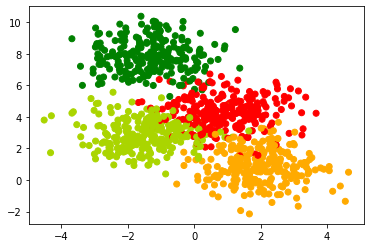

In [192]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)

In [193]:
X_train,X_val,Y_train,Y_val=train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(750, 2) (250, 2) (750,) (250,)


In [194]:
X_train,X_val,Y_train,Y_val=map(torch.tensor,(X_train,X_val,Y_train,Y_val))

In [195]:
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

torch.Size([750, 2]) torch.Size([250, 2]) torch.Size([750]) torch.Size([250])


In [196]:
def model(x):
  a1=torch.matmul(x,weights1)+bias1
  h1=a1.sigmoid()
  # print(h1.shape)
  a2=torch.matmul(h1,weights2)+bias2
  h2=a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
  return h2

In [197]:
def loss_fn(y_,y):
  return -(y_[range(y.shape[0]),y].log()).mean()

In [198]:
def accuracy(y_,y):
  ypred=torch.argmax(y_,dim=1)
  return (ypred==y).float().mean()

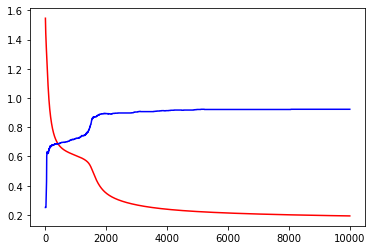

In [199]:
import math
torch.manual_seed(0)
weights1=torch.randn(2,2)/math.sqrt(2)
weights1.requires_grad_()
bias1=torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2,4)/math.sqrt(2)
weights2.requires_grad_()

bias2=torch.zeros(4, requires_grad=True)
lr=.2
epochs=10000


X_train=X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []
for epoch in range(epochs):
  y_=model(X_train)
  loss = loss_fn(y_,Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_,Y_train))
  with torch.no_grad():
    weights1-=lr*weights1.grad
    weights2-=lr*weights2.grad

    bias1-=lr*bias1.grad
    bias2-=lr*bias2.grad
    weights1.grad.zero_()
    weights2.grad.zero_()
    bias1.grad.zero_()
    bias2.grad.zero_()
plt.plot(loss_arr,'r-')
plt.plot(acc_arr,'b-')

In [200]:
acc_arr[9990]


tensor(0.9227)

In [201]:
y=model(X_train)

#`-----------------------------------NN.parameters---------------------------`

In [202]:
import torch.nn as nn
import torch.nn.functional as F

In [203]:
class FirstNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1= nn.parameter(torch.randn(2,2))/math.sqrt(2)
    self.weights2= nn.parameters(torch.randn(2,4))/math.sqrt(2)
    self.bias1=nn.parameters(torch.randn(2))
    self.bias2=nn.parameters(torch.randn(4))
  def forward(self,X):
    a1=torch.matmul(X,self.weights1)+self.bias1
    h1=a1.sigmoid()
    a2=torch.matmul(h1,self.weights2)+self.bias2
    h2=a2.sigmoid()
    return h2
  



In [204]:
def fit(epochs=10000,lr=.2):
  loss_arr=[]
  acc_arr=[]
  for epoch in range(epochs):
    y_hat=fn(X_train)
    loss=F.cross_entropy(y_hat,Y_train)
    loss_arr.append(loss)
    acc_arr.append(accuracy(y_hat,Y_train))
    loss.backward()
    with torch.no_grad():
      for param in parameters:
        param-=lr*param.grad
      fn.zero_grad()

  plt.plot(loss_arr,'r-')
  plt.plot(acc_arr,'b-')


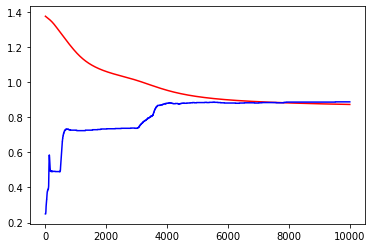

In [215]:
from torch.nn import functional as F
class secondnetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1=nn.Linear(2,2)
    self.l2=nn.Linear(2,4)
  def forward(self,x):
    a1=self.l1(x)
    h1=a1.sigmoid()
    a2=self.l2(h1)
    h2=a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2
def accuracy(y_,y):
  pred=torch.argmax(y_,dim=1)
  return (pred==y).float().mean()


def fit(epochs=10000,lr=.1):
  err_arr=[]
  acc_arr=[]
  for epoch in range(epochs):
    y_=feednet(X_train)
    error=F.cross_entropy(y_,Y_train)
    err_arr.append(error.item())
    acc_arr.append(accuracy(y_,Y_train))
    error.backward()
    with torch.no_grad():
      for param in feednet.parameters():
        param-=lr*param.grad
      feednet.zero_grad()
  plt.plot(err_arr,'r-')
  plt.plot(acc_arr,'b-')
feednet=secondnetwork()
fit()





#`*CNNs`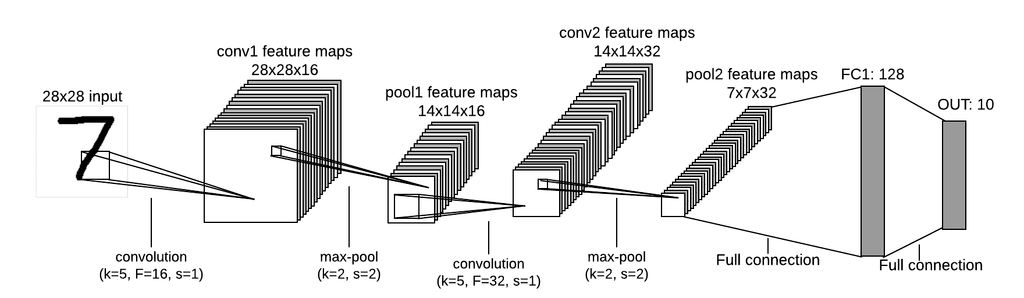

In [216]:
import torchvision
import torchvision.transforms as transforms
trainset= torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transforms.ToTensor())

Files already downloaded and verified


In [217]:
classes=['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [218]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=8,shuffle=True)
dataloader=iter(trainloader)
images,labels=dataloader.next()

In [222]:
imglist=[image for image in images]
print(imglist[0].shape)

torch.Size([3, 32, 32])


In [219]:
class alayerCNN(nn.Module):
  def __init__(self):
    super(alayerCNN,self).__init__()
    self.conv1=nn.Conv2d(3,16,3)
  def forward(self,x):
    x=self.conv1(x)
    return x

In [220]:
cnn=alayerCNN()
out=cnn(images)
print(out.shape)

torch.Size([8, 16, 30, 30])


In [225]:
for param in cnn.parameters():
  print(param.shape)

torch.Size([3, 3, 3])
torch.Size([])


In [223]:
from itertools import repeat
out= list(map(np.transpose,[image for image in (image.detach().numpy() for image in images)],repeat((1,2,0))))

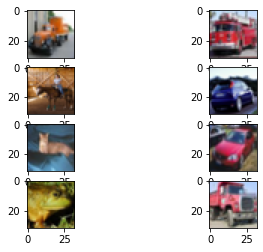

In [224]:
fig,ax=plt.subplots(4,2)
for i,img in enumerate(out):

  ax[i//2,i%2].imshow(img)

In [252]:
def imgloader(images):
  return list(map(np.transpose,[image for image in (image.detach().numpy() for image in images)],repeat((1,2,0))))

In [229]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

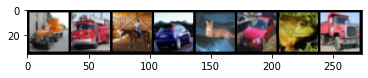

  truck  truck  horse  car  cat  car  frog  truck


In [240]:
imshow(torchvision.utils.make_grid(images))
print(' ' ,'  '.join(classes[labels[j]] for j in range(8)))

In [244]:
class AlayerCNN(nn.Module):
  def __init__(self):
    super(AlayerCNN,self).__init__()
    self.conv1=nn.Conv2d(3,16,3)
  def forward(self,x):
    x=self.conv1(x)
    return x

In [245]:
cnn=AlayerCNN()
out=cnn(images)
print(out.shape)

torch.Size([8, 16, 30, 30])


In [273]:
cnnw=[]
for param in cnn.parameters():
  cnnw.append(param)
  break

for i in out:
  print(i.shape)

torch.Size([16, 30, 30])
torch.Size([16, 30, 30])
torch.Size([16, 30, 30])
torch.Size([16, 30, 30])
torch.Size([16, 30, 30])
torch.Size([16, 30, 30])
torch.Size([16, 30, 30])
torch.Size([16, 30, 30])


In [276]:
print(cnnw[0].shape)

torch.Size([16, 3, 3, 3])


In [ ]:
def imgloader(images):
  return list(map(np.transpose,[image for image in (image.detach().numpy() for image in images)],repeat((1,2,0))))

In [281]:
def plot_cnn_weights(weights,batch_size,out_filters):
  outlist=imgloader(weights)
  plt.rcParams["figure.figsize"] = (batch_size*5,out_filters*10)
  fig,ax= plt.subplots(out_filters,batch_size)
  for i,imspace in enumerate(outlist):
    for j in range(batch_size):
      ax[i,j].imshow(imspace[:,:,j])


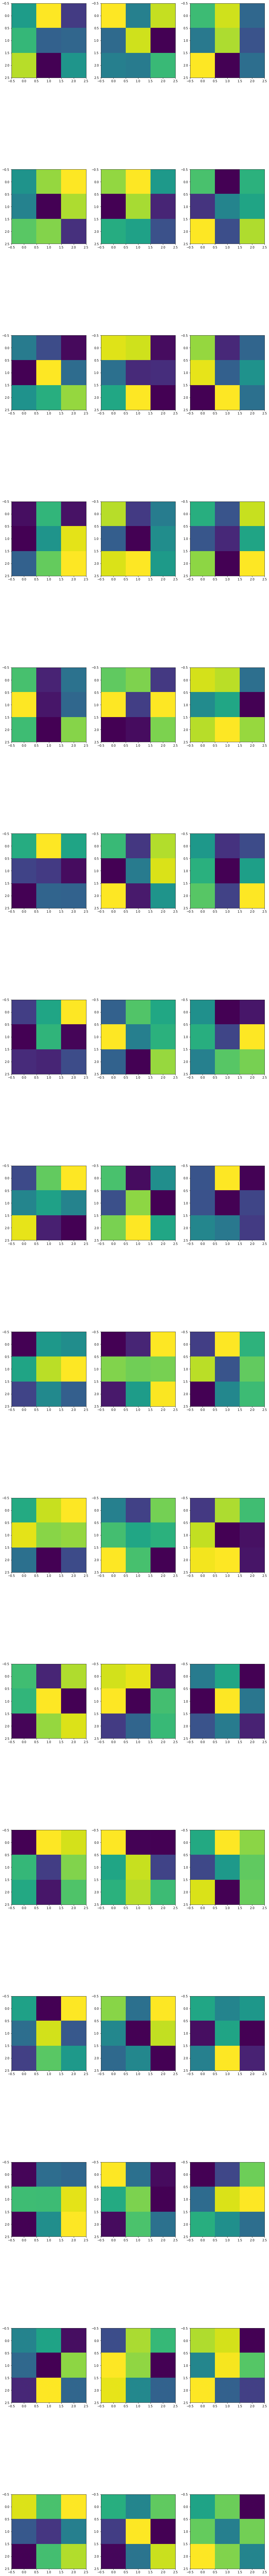

In [282]:
plot_cnn_weights(cnnw[0],3,16)